# Boston Housing Dataset

## Description
The Boston Housing Dataset is a classic dataset in the realm of machine learning and statistics, widely used for regression tasks. This dataset originated from a study conducted by the U.S. Census Service in 1970, aimed at understanding the factors that influence housing prices in Boston. It serves as a valuable resource for both academic and practical applications, providing insights into the real estate market and socio-economic factors affecting urban living.

The dataset includes various features that contribute to housing prices, such as crime rates, the average number of rooms per dwelling, accessibility to highways, and more. By leveraging these features, machine learning models can be developed to predict housing prices, allowing for a deeper understanding of the dynamics of the Boston housing market.

## Dataset Description
- This dataset contains 506 instances, each representing a unique housing observation in the Boston area.
- The features include:
  - **CRIM**: Per capita crime rate by town
  - **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
  - **INDUS**: Proportion of non-retail business acres per town
  - **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - **NOX**: Nitric oxides concentration (parts per 10 million)
  - **RM**: Average number of rooms per dwelling
  - **AGE**: Proportion of owner-occupied units built prior to 1940
  - **DIS**: Weighted distances to five Boston employment centers
  - **RAD**: Index of accessibility to radial highways
  - **TAX**: Full-value property tax rate per $10,000
  - **PTRATIO**: Pupil-teacher ratio by town
  - **B**: \(1000(Bk - 0.63)^2\) where \(Bk\) is the proportion of Black residents by town
  - **LSTAT**: Percentage of lower status of the population
- The ground truth label **MEDV** represents the median value of owner-occupied homes in $1000s.

## File Descriptions
- **boston_housing.csv**: The complete dataset containing the features and the target variable.

## Citation
Harrison, D. & Rubinfeld, D. L. (1978). Hedonic prices and the demand for clean air. *Journal of Environmental Economics and Management*, 5(1), 81-102.

https://www.kaggle.com/c/boston-housing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import itertools
import json

from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [3]:
beautiful_colors = [
    "#FF6B6B", "#FFE66D", "#4ECDC4", "#556270", "#C7F464",
    "#FFCC5C", "#88D8B0", "#8E44AD", "#3498DB", "#E74C3C",
    "#F39C12", "#27AE60", "#2980B9", "#D35400", "#1ABC9C",
    "#9B59B6", "#2ECC71", "#95A5A6", "#34495E", "#E67E22",
    "#16A085", "#F1C40F", "#BDC3C7", "#E74C3C", "#2C3E50",
    "#7FDBFF", "#0074D9", "#FF851B", "#2ECC40", "#B10DC9",
    "#FFDC00", "#39CCCC", "#001f3f", "#85144b", "#3D9970",
    "#111111", "#AAAAAA", "#F012BE", "#FF4136", "#01FF70"
]

In [4]:
df = pd.read_csv("datasets/train.csv")

In [5]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
df.columns = [col.lower() for col in df]

In [9]:
df.drop("id", axis=1, inplace=True)

In [10]:
df = df[df.select_dtypes(include="object").columns.to_list() + df.select_dtypes(exclude="object").columns.to_list()]
df = df[df.drop("medv", axis=1).columns.to_list() + ["medv"]]

In [11]:
df.sample(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
18,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.233,4,307,21.0,360.17,22.6,12.7


# Target Value - Median Value (1000$)

In [12]:
df.describe()["medv"]

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

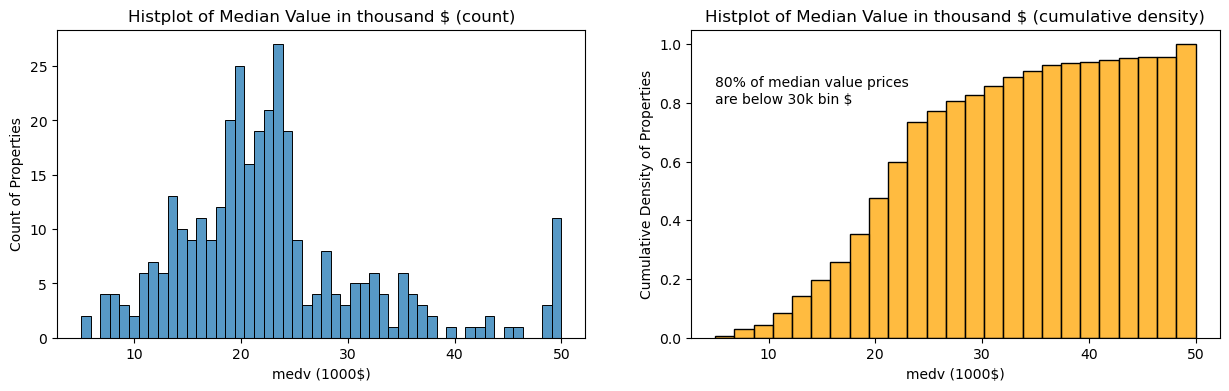

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax[0].set_title("Histplot of Median Value in thousand $ (count)")
sns.histplot(data=df, x="medv", bins=50, ax=ax[0])
ax[0].set_xlabel("medv (1000$)")
ax[0].set_ylabel("Count of Properties")

ax[1].set_title("Histplot of Median Value in thousand $ (cumulative density)")
sns.histplot(data=df, x="medv", bins=25, ax=ax[1], stat="density", cumulative=True, color="orange")
ax[1].set_xlabel("medv (1000$)")
ax[1].set_ylabel("Cumulative Density of Properties")


ax[1].text(5, 0.8, f"80% of median value prices\nare below 30k bin $")

plt.show()

# Features

- The features include:
  - **CRIM**: Per capita crime rate by town
  - **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
  - **INDUS**: Proportion of non-retail business acres per town
  - **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - **NOX**: Nitric oxides concentration (parts per 10 million)
  - **RM**: Average number of rooms per dwelling
  - **AGE**: Proportion of owner-occupied units built prior to 1940
  - **DIS**: Weighted distances to five Boston employment centers
  - **RAD**: Index of accessibility to radial highways
  - **TAX**: Full-value property tax rate per $10,000
  - **PTRATIO**: Pupil-teacher ratio by town
  - **B**: \(1000(Bk - 0.63)^2\) where \(Bk\) is the proportion of Black residents by town
  - **LSTAT**: Percentage of lower status of the population
- The ground truth label **MEDV** represents the median value of owner-occupied homes in $1000s.

In [13]:
numerical_features = ["crim", "zn", "indu", "nox", "rm", "age", "dis", "tax", "ptratio", "black", "lstat"]
categorical_features = ["chas"]

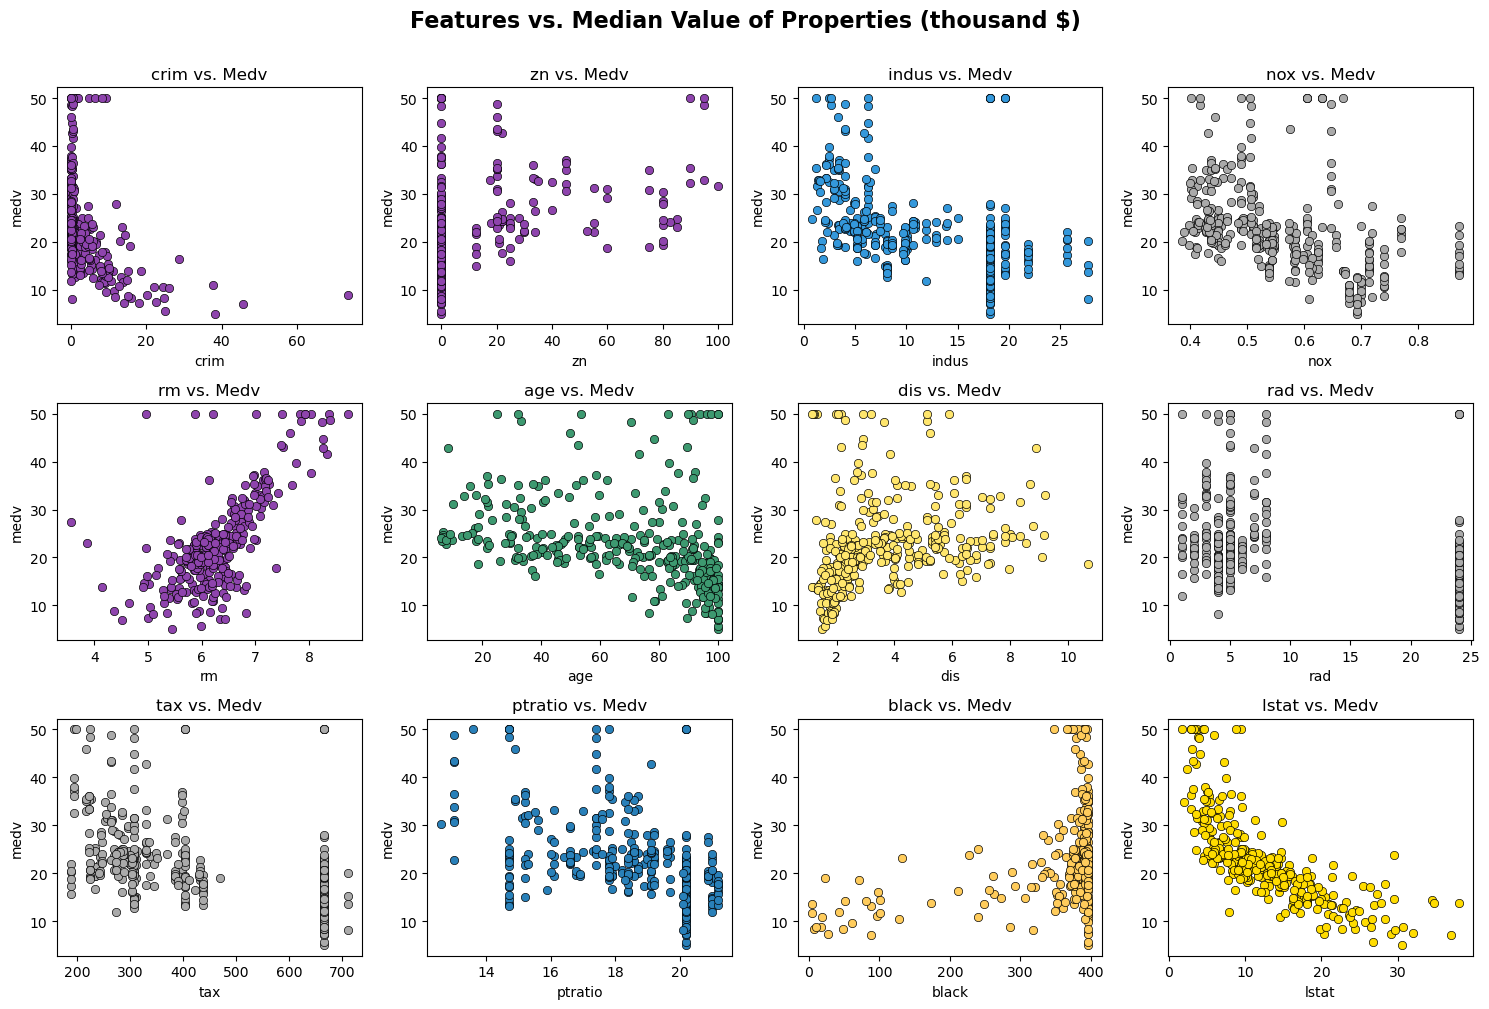

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

ax = ax.flatten()

for i, feature in enumerate(df.drop(["chas","medv"], axis=1).columns.to_list()):

    sns.scatterplot(data=df, x=feature, y="medv", ax=ax[i], color=np.random.choice(beautiful_colors), edgecolors="black")
    ax[i].set_title(f"{feature} vs. Medv")

plt.suptitle("Features vs. Median Value of Properties (thousand $)", fontsize=16, y=1.005, fontweight="bold")

plt.tight_layout()
plt.show()

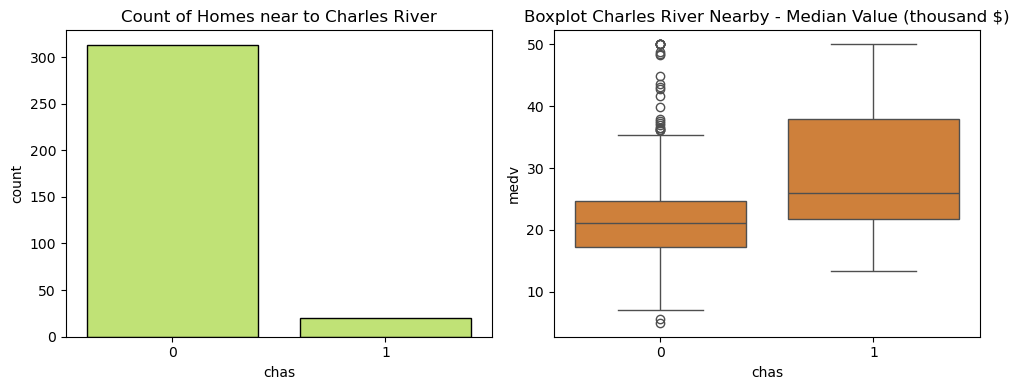

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].set_title("Count of Homes near to Charles River")
sns.countplot(data=df, x="chas", ax=ax[0], color=np.random.choice(beautiful_colors), edgecolor="black")

ax[1].set_title("Boxplot Charles River Nearby - Median Value (thousand $)")
sns.boxplot(data=df, x="chas", y="medv", showfliers=True, color=np.random.choice(beautiful_colors), ax=ax[1])

plt.tight_layout()
plt.show()

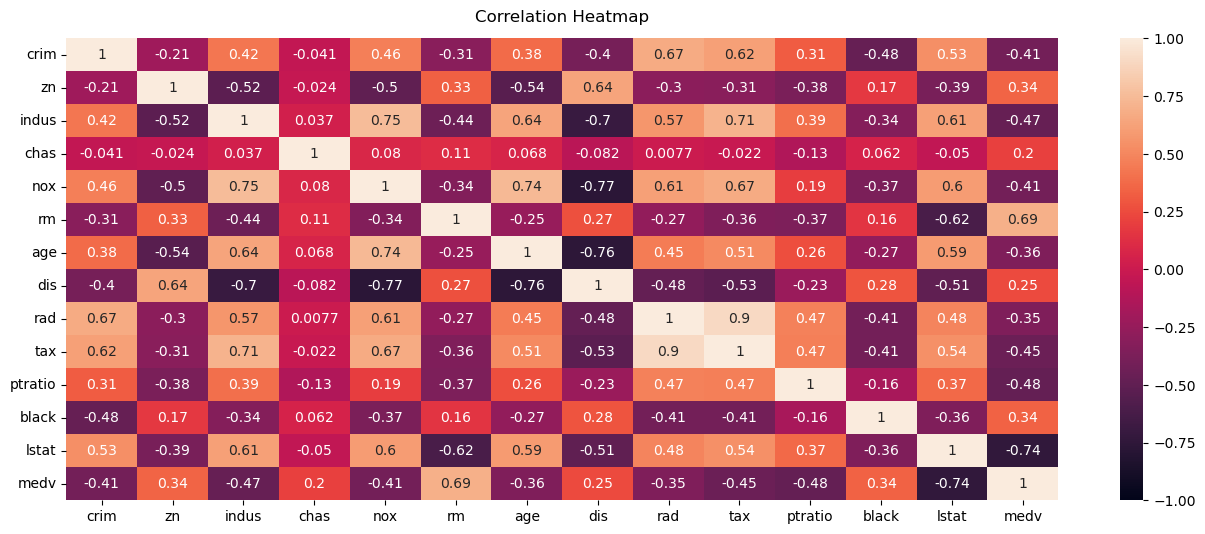

In [14]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [17]:
df.replace(np.inf, np.nan, inplace=True)
print(f"Is there row(s) with null/nans: {np.any(df.isna())}")

Is there row(s) with null/nans: False


# Single Layer Perceptron = Linear Regression in Current Situation

Creating custom Models

In [5]:
tf.keras.utils.get_custom_objects().clear()

In [19]:
@tf.keras.utils.register_keras_serializable()
class SLP(tf.keras.Model):
    def __init__(self, input_dim, output_dim, seed=42):
        super(SLP, self).__init__()
        
        initializer = tf.keras.initializers.GlorotUniform(seed=seed)

        self.W = self.add_weight(name="Weights", shape=(input_dim, output_dim),
                                 initializer=initializer,
                                 trainable=True)
        self.b = self.add_weight(name="Biases", shape=(output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        logits = tf.matmul(inputs, self.W) + self.b
        return logits

In [20]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [22]:
X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epochs_list = [50, 150, 300]

params = []
mae_list = []
root_mean_squared_errors_list = []

for lr in learning_rates:
    for bs in batch_sizes:
        for epochs in epochs_list:
            rmse_current_config = []
            mae_current_config = []

            for (train_idx, val_idx) in kfold.split(X, y):
                
                X_train, y_train = tf.gather(X, train_idx), tf.gather(y, train_idx)
                X_val, y_val = tf.gather(X, val_idx), tf.gather(y, val_idx)

                # StandardScaling=Normalization
                norm_layer = tf.keras.layers.Normalization(axis=1)
                norm_layer.adapt(X_train)

                X_train = norm_layer(X_train)
                X_val = norm_layer(X_val)

                slp_model = SLP(X_train.shape[1], y_train.shape[1])
                slp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

                slp_model.fit(X_train, y_train, epochs=epochs, batch_size=bs, verbose=2, validation_data=(X_val, y_val))

                val_predictions = slp_model.predict(X_val)

                val_rmse = root_mean_squared_error(y_val.numpy(), val_predictions)
                val_mae = mean_absolute_error(y_val.numpy(), val_predictions)
                
                rmse_current_config.append(val_rmse)
                mae_current_config.append(val_mae)

                K.clear_session()
                del norm_layer

            root_mean_squared_errors_list.append(rmse_current_config)
            mae_list.append(mae_current_config)
            params.append([lr, bs, epochs])


In [26]:
print(f"Best 5 fold root mean squared error: {round(np.min(np.mean(np.array(root_mean_squared_errors_list), axis=1)), 4)}")

Best 5 fold root mean squared error: 4.984600067138672


In [27]:
print(f"Best 5 fold mean absolut error: {round(np.min(np.mean(np.array(mae_list), axis=1)), 4)}")

Best 5 fold mean absolut error: 3.4210000038146973


In [64]:
best_params = params[np.argmin(np.mean(np.array(root_mean_squared_errors_list), axis=1))]

In [66]:
best_params = [0.1, 64, 150]

In [31]:
K.clear_session()

### Predict on 20 % percent

In [110]:
train_idx = np.random.randint(0, 333, round(len(X)*0.8))
val_idx = np.setdiff1d(np.arange(0, len(X)), train_idx)

In [111]:
X_train, y_train = tf.gather(X, train_idx), tf.gather(y, train_idx)
X_val, y_val = tf.gather(X, val_idx), tf.gather(y, val_idx)

In [112]:
norm_layer = tf.keras.layers.Normalization(axis=1)
norm_layer.adapt(X_train)

In [113]:
X_train = norm_layer(X_train)
X_val = norm_layer(X_val)


In [114]:
slp_model = SLP(X_train.shape[1], y_train.shape[1])
slp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=best_params[0]), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = slp_model.fit(X_train, y_train, epochs=best_params[2], batch_size=best_params[1], verbose=2, validation_data=(X_val, y_val))

Epoch 1/150
5/5 - 1s - loss: 599.8582 - root_mean_squared_error: 24.4920 - val_loss: 566.7936 - val_root_mean_squared_error: 23.8074 - 658ms/epoch - 132ms/step
Epoch 2/150
5/5 - 0s - loss: 554.2695 - root_mean_squared_error: 23.5429 - val_loss: 550.0377 - val_root_mean_squared_error: 23.4529 - 87ms/epoch - 17ms/step
Epoch 3/150
5/5 - 0s - loss: 527.4272 - root_mean_squared_error: 22.9658 - val_loss: 535.0301 - val_root_mean_squared_error: 23.1307 - 104ms/epoch - 21ms/step
Epoch 4/150
5/5 - 0s - loss: 502.8206 - root_mean_squared_error: 22.4237 - val_loss: 509.6330 - val_root_mean_squared_error: 22.5751 - 79ms/epoch - 16ms/step
Epoch 5/150
5/5 - 0s - loss: 475.1641 - root_mean_squared_error: 21.7983 - val_loss: 486.8300 - val_root_mean_squared_error: 22.0642 - 80ms/epoch - 16ms/step
Epoch 6/150
5/5 - 0s - loss: 451.1737 - root_mean_squared_error: 21.2409 - val_loss: 461.7213 - val_root_mean_squared_error: 21.4877 - 133ms/epoch - 27ms/step
Epoch 7/150
5/5 - 0s - loss: 427.9397 - root_mea

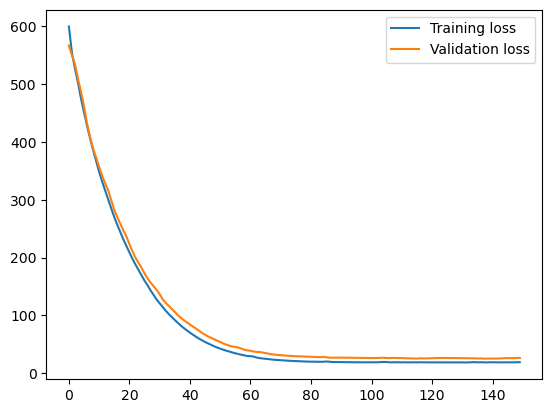

In [115]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [124]:
val_predictions = slp_model.predict(X_val)

print(f"Validation RMSE: {root_mean_squared_error(y_val.numpy(), val_predictions)}")
print(f"Validation MAE: {mean_absolute_error(y_val.numpy(), val_predictions)}")

5/5 [==============================] - 0s 3ms/step
Validation RMSE: 5.142950534820557
Validation MAE: 3.7683281898498535


# MLP

In [127]:
tf.keras.utils.get_custom_objects().clear()

In [128]:
@tf.keras.utils.register_keras_serializable()
class MLP(tf.keras.Model):
    def __init__(self, input_dim, output_dim, hidden_layers_attributes=[32, 16], seed=42):
        super(MLP, self).__init__()

        assert hidden_layers_attributes is not None, "hidden_layer_attributes must be a list with attributes"

        initializer = tf.keras.initializers.GlorotUniform(seed=seed)

        self.input_layers = {}
        self.hidden_layers = {}
        self.output_layers = {}

        self.input_layers["Weights"] = self.add_weight(name="Weights_input", shape=(input_dim, hidden_layers_attributes[0]),
                                 initializer=initializer,
                                 trainable=True)
        self.input_layers["Biases"] = self.add_weight(name="Biases_input", shape=(hidden_layers_attributes[0],),
                                 initializer='zeros',
                                 trainable=True)
                
        hidden_layer_sizes = [size for size in hidden_layers_attributes if isinstance(size, int)]

        self.dropout_layers = [
            tf.keras.layers.Dropout(rate=dropout_rate) 
            for dropout_rate in hidden_layers_attributes if isinstance(dropout_rate, float)
        ]

        self.is_model_with_dropout = bool(self.dropout_layers)

        hidden_layer_weights = []
        hidden_layer_biases = []

        for idx, layer_size in enumerate(hidden_layer_sizes):
            if idx == len(hidden_layer_sizes) - 1:
                break

            if isinstance(layer_size, int):
                next_layer_weights = self.add_weight(name=f"Weight_{idx}", shape=(layer_size, hidden_layer_sizes[idx+1]),
                                 initializer=initializer,
                                 trainable=True)
                next_layer_biases = self.add_weight(name=f"Biases_{idx}", shape=(hidden_layer_sizes[idx+1],),
                    initializer='zeros',
                    trainable=True)

                hidden_layer_weights.append(next_layer_weights)
                hidden_layer_biases.append(next_layer_biases)
            

        self.hidden_layers["Weights"] = hidden_layer_weights
        self.hidden_layers["Biases"] = hidden_layer_biases


        self.output_layers["Weights"] = self.add_weight(name="Weights_output", shape=(hidden_layer_sizes[-1], output_dim),
                                 initializer=initializer,
                                 trainable=True)
        self.output_layers["Biases"] = self.add_weight(name="Biases_output", shape=(output_dim,),
                                 initializer='zeros',
                                 trainable=True)


    def call(self, inputs, training=False):
        x = tf.matmul(inputs, self.input_layers["Weights"]) + self.input_layers["Biases"]

        for idx, weight in enumerate(self.hidden_layers["Weights"]):
            x = tf.nn.relu(x)
            x = tf.matmul(x, weight) + self.hidden_layers["Biases"][idx]
            
            if training and self.is_model_with_dropout:
                x = self.dropout_layers[idx](x, training=training)

        x = tf.nn.relu(x)
        x = tf.matmul(x, self.output_layers["Weights"]) + self.output_layers["Biases"]

        return x

In [129]:
df = pd.read_csv("datasets/train.csv")

In [130]:
# Shuffle df
df = df.sample(len(df))

In [131]:
df.columns = [col.lower() for col in df]
df.drop("id", axis=1, inplace=True)

In [132]:
df = df[df.select_dtypes(include="object").columns.to_list() + df.select_dtypes(exclude="object").columns.to_list()]
df = df[df.drop("medv", axis=1).columns.to_list() + ["medv"]]

In [133]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [134]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [135]:
X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [299]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epochs_list = [50, 150, 300]
hidden_layers_list = [[16, 16], [16, 0.1, 8], [32, 16], [32, 0.2, 16]]

param_grid = list(itertools.product(hidden_layers_list, learning_rates, batch_sizes, epochs_list))

In [300]:
def evaluate_model(X, y, model_params):
    results = {}
    mae_list = []
    root_mean_squared_errors_list = []
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, val_idx in kfold.split(X, y):

        hidden_layers_attributes, lr, bs, epochs  = model_params

        X_train, y_train = tf.gather(X, train_idx), tf.gather(y, train_idx)
        X_val, y_val = tf.gather(X, val_idx), tf.gather(y, val_idx)

        # StandardScaling=Normalization
        norm_layer = tf.keras.layers.Normalization(axis=1)
        norm_layer.adapt(X_train)

        X_train = norm_layer(X_train)
        X_val = norm_layer(X_val)

        mlp_model = MLP(X_train.shape[1], y_train.shape[1], hidden_layers_attributes=hidden_layers_attributes)
        mlp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        mlp_model.fit(X_train, y_train, epochs=epochs, batch_size=bs, verbose=2, validation_data=(X_val, y_val))

        val_predictions = mlp_model.predict(X_val)
        
        root_mean_squared_errors_list.append(root_mean_squared_error(y_val.numpy(), val_predictions))
        mae_list.append(mean_absolute_error(y_val.numpy(), val_predictions))

        K.clear_session()
        del norm_layer

    results["params"] = model_params
    results["mean_rmse"] = np.mean(root_mean_squared_errors_list)
    results["mean_mae"] = np.mean(mae_list)

    return results

In [302]:
cross_validated_df = []

In [ ]:
for param in param_grid:
    cross_validated_df.append(evaluate_model(X, y, param))
    print(param)

In [305]:
pd.DataFrame(cross_validated_df).sort_values(by="mean_rmse").head(10)

,params,mean_rmse,mean_mae
59,"([16, 0.1, 8], 0.01, 32, 300)",3.531492,2.477467
29,"([16, 16], 0.1, 16, 300)",3.549581,2.444770
105,"([32, 16], 0.1, 64, 50)",3.571640,2.534740
58,"([16, 0.1, 8], 0.01, 32, 150)",3.576637,2.574736
22,"([16, 16], 0.01, 32, 150)",3.592318,2.640037
55,"([16, 0.1, 8], 0.01, 16, 150)",3.599859,2.591767
25,"([16, 16], 0.01, 64, 150)",3.603054,2.642214
26,"([16, 16], 0.01, 64, 300)",3.618339,2.662520
66,"([16, 0.1, 8], 0.1, 32, 50)",3.619495,2.621602
86,"([32, 16], 0.001, 32, 300)",3.622042,2.643463


In [118]:
best_params = ([32, 16], 0.001, 16, 180)	

In [88]:
K.clear_session()

### Predict on 20 % percent

In [89]:
train_idx = np.random.randint(0, 333, round(len(X)*0.8))
val_idx = np.setdiff1d(np.arange(0, len(X)), train_idx)

In [90]:
X_train, y_train = tf.gather(X, train_idx), tf.gather(y, train_idx)
X_val, y_val = tf.gather(X, val_idx), tf.gather(y, val_idx)

In [91]:
norm_layer = tf.keras.layers.Normalization(axis=1)
norm_layer.adapt(X_train)

In [92]:
X_train = norm_layer(X_train)
X_val = norm_layer(X_val)

In [93]:
hidden_layers_attributes, lr, bs, epochs  = best_params

In [104]:
K.clear_session()

In [ ]:
mlp_model = MLP(X_train.shape[1], y_train.shape[1], hidden_layers_attributes=hidden_layers_attributes)
mlp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = mlp_model.fit(X_train, y_train, epochs=epochs, batch_size=bs, verbose=2, validation_data=(X_val, y_val))

Epoch 1/180
17/17 - 1s - loss: 553.7044 - root_mean_squared_error: 23.5309 - val_loss: 618.4626 - val_root_mean_squared_error: 24.8689 - 689ms/epoch - 41ms/step
Epoch 2/180
17/17 - 0s - loss: 531.4463 - root_mean_squared_error: 23.0531 - val_loss: 593.1891 - val_root_mean_squared_error: 24.3555 - 111ms/epoch - 7ms/step
Epoch 3/180
17/17 - 0s - loss: 507.0530 - root_mean_squared_error: 22.5178 - val_loss: 565.1313 - val_root_mean_squared_error: 23.7725 - 133ms/epoch - 8ms/step
Epoch 4/180
17/17 - 0s - loss: 477.8456 - root_mean_squared_error: 21.8597 - val_loss: 528.1353 - val_root_mean_squared_error: 22.9812 - 118ms/epoch - 7ms/step
Epoch 5/180
17/17 - 0s - loss: 438.9431 - root_mean_squared_error: 20.9510 - val_loss: 478.6973 - val_root_mean_squared_error: 21.8792 - 140ms/epoch - 8ms/step
Epoch 6/180
17/17 - 0s - loss: 387.3565 - root_mean_squared_error: 19.6814 - val_loss: 414.1110 - val_root_mean_squared_error: 20.3497 - 157ms/epoch - 9ms/step
Epoch 7/180
17/17 - 0s - loss: 323.4864

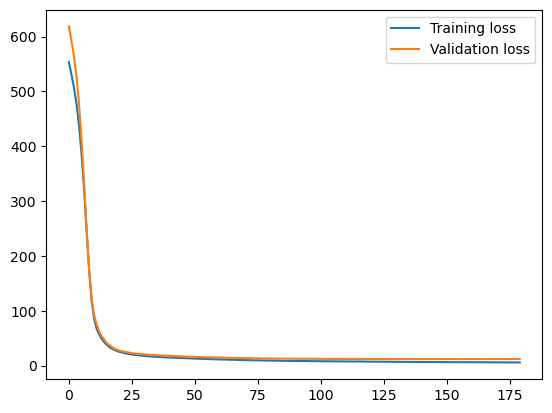

In [106]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [107]:
val_predictions = mlp_model.predict(X_val)

print(f"Validation RMSE: {root_mean_squared_error(y_val.numpy(), val_predictions)}")
print(f"Validation MAE: {mean_absolute_error(y_val.numpy(), val_predictions)}")

5/5 [==============================] - 0s 4ms/step
Validation RMSE: 3.4482667446136475
Validation MAE: 2.5953757762908936


# Save model and normalization layer

In [172]:
norm_layer = tf.keras.layers.Normalization(axis=1)
norm_layer.adapt(X)

In [173]:
params = {
    'mean': norm_layer.mean.numpy().tolist(),
    'variance': norm_layer.variance.numpy().tolist(),
    'count': float(norm_layer.count.numpy())
}
with open("norm_layer_values", 'w') as f:
    json.dump(params, f)

In [174]:
X_scaled = norm_layer(X)

In [175]:
hidden_layers_attributes, lr, bs, epochs  = best_params

In [176]:
K.clear_session()

In [177]:
mlp_model = MLP(X_scaled.shape[1], y.shape[1], hidden_layers_attributes=hidden_layers_attributes)
mlp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = mlp_model.fit(X_scaled, y, epochs=epochs, batch_size=bs, verbose=2)


Epoch 1/180
21/21 - 1s - loss: 596.7059 - root_mean_squared_error: 24.4276 - 719ms/epoch - 34ms/step
Epoch 2/180
21/21 - 0s - loss: 566.8851 - root_mean_squared_error: 23.8093 - 83ms/epoch - 4ms/step
Epoch 3/180
21/21 - 0s - loss: 532.5870 - root_mean_squared_error: 23.0778 - 191ms/epoch - 9ms/step
Epoch 4/180
21/21 - 0s - loss: 486.1842 - root_mean_squared_error: 22.0496 - 106ms/epoch - 5ms/step
Epoch 5/180
21/21 - 0s - loss: 421.5348 - root_mean_squared_error: 20.5313 - 75ms/epoch - 4ms/step
Epoch 6/180
21/21 - 0s - loss: 336.8077 - root_mean_squared_error: 18.3523 - 67ms/epoch - 3ms/step
Epoch 7/180
21/21 - 0s - loss: 237.7439 - root_mean_squared_error: 15.4189 - 90ms/epoch - 4ms/step
Epoch 8/180
21/21 - 0s - loss: 152.1059 - root_mean_squared_error: 12.3331 - 64ms/epoch - 3ms/step
Epoch 9/180
21/21 - 0s - loss: 98.5965 - root_mean_squared_error: 9.9296 - 83ms/epoch - 4ms/step
Epoch 10/180
21/21 - 0s - loss: 70.6854 - root_mean_squared_error: 8.4075 - 83ms/epoch - 4ms/step
Epoch 11/

In [178]:
mlp_model.save("mlp_model")

INFO:tensorflow:Assets written to: mlp_model\assets
